In [54]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_files = glob.glob("data/*.csv")

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0,sep=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]] = frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]].astype(float)


In [ ]:
frame

In [55]:
df_MSC_lock = frame[(frame['NameOfLock'] == 'MCS_lock')]
df_TTAS_lock = frame[(frame['NameOfLock'] == 'TTAS_lock')]
df_TAS_lock = frame[(frame['NameOfLock'] == 'TAS_lock')]
df_Array_lock = frame[(frame['NameOfLock'] == 'Array_lock')]
df_Ticket_lock = frame[(frame['NameOfLock'] == 'Ticket_lock')]
df_CLH_lock = frame[(frame['NameOfLock'] == 'CLH_lock')]

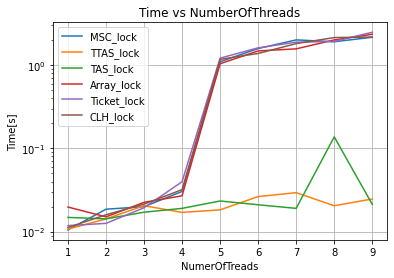

In [56]:
plt.semilogy(df_MSC_lock.NumberOfThreads,df_MSC_lock.RunTime,label = "MSC_lock")
plt.semilogy(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,label = "TTAS_lock")
plt.semilogy(df_TAS_lock.NumberOfThreads,df_TAS_lock.RunTime,label = "TAS_lock")
plt.semilogy(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock")
plt.semilogy(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Ticket_lock")
plt.semilogy(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,label = "CLH_lock")
plt.xlabel("NumerOfTreads")
plt.ylabel("Time[s]")
plt.title("Time vs NumberOfThreads")
plt.grid()
plt.savefig("Time vs NumberOfThreads")
plt.legend()